<a href="https://colab.research.google.com/github/gabhinav0110/neuralDDE_ROM_Closure/blob/master/DDE_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/Colab\ Notebooks/NeuralODEs_ROM_Closure/neuralDDE_ROM_Closure

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/NeuralODEs_ROM_Closure/neuralDDE_ROM_Closure


In [2]:
import tensorflow as tf
from pylab import cos, linspace, subplots, array
from src.utilities.DDE_Solver import ddeinttf

tf.keras.backend.set_floatx('float32')

### Example 1

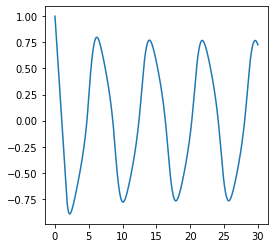

In [3]:
class model(tf.keras.Model):
    def call(self, Y, t):
        return -Y(t - 3 * cos(Y(t)) ** 2)

class values_before_zero(tf.keras.Model):
    def call(self, t):
        return tf.convert_to_tensor([1.], tf.float32)

tt = tf.linspace(0., 30., 2000)

ic = values_before_zero()
func = model()
yy = ddeinttf(func, ic, tt)

fig, ax = subplots(1, figsize=(4, 4))
ax.plot(tt.numpy(), yy[:, 0].numpy())

### Example 2

Computing for d=0.00
Computing for d=0.20


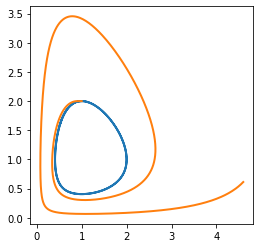

In [4]:
class model(tf.keras.Model):
    def call(self, Y, t, d):
        x = Y(t)[0, 0]
        y = Y(t)[0, 1]
        xd = Y(t - d)[0, 0]
        yd = Y(t - d)[0, 1]
        return tf.expand_dims(tf.convert_to_tensor([0.5 * x * (1 - yd), -0.5 * y * (1 - xd)]), axis=0)

class values_before_zero(tf.keras.Model):
    def call(self, t):
        return tf.expand_dims(tf.convert_to_tensor([1., 2.]), axis=0)

tt = tf.linspace(2., 30., 2000)

ic = values_before_zero()
func = model()

fig, ax = subplots(1, figsize=(4, 4))

for d in tf.convert_to_tensor([0., 0.2], tf.float32):
    print("Computing for d=%.02f" % d)
    yy = ddeinttf(func, ic, tt, fargs=(d,))
    # WE PLOT X AGAINST Y
    ax.plot(yy[:, 0, 0], yy[:, 0, 1], lw=2, label="delay = %.01f" % d)

### Example 3 (Time-reversed)

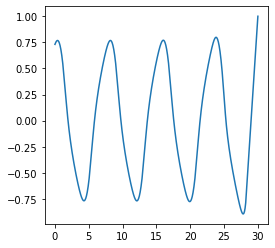

In [5]:
class model(tf.keras.Model):
    def call(self, Y, t):
        return Y(t + 3 * cos(Y(t)) ** 2)

class values_before_zero(tf.keras.Model):
    def call(self, t):
        return tf.convert_to_tensor([1.], tf.float32)

tt = tf.linspace(30., 0, 2000)

ic = values_before_zero()
func = model()
yy = ddeinttf(func, ic, tt)

fig, ax = subplots(1, figsize=(4, 4))
ax.plot(tt.numpy(), yy[:, 0].numpy())